# 多次元データの可視化
基本的に統計データは様々な要因となる変数が合わさって結果が成り立っている。しかしテーブルデータからではデータそのものがどのような特徴を持っているかを見ることはヒストグラムなどで分からなくもないが解釈が困難になる。そこで主成分分析を用いることでデータを圧縮し、何を基準に圧縮されたかを解釈することでデータの特徴を把握できる。

# ライブラリのインポート

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# データの読み込みと目的変数・説明変数の分離

In [ ]:
df = pd.read_csv("wine.csv")
y_name = "Wine"
y = df[y_name].values
x_tab = df.drop(y_name,axis=1)
x_name = x_tab.columns
x = x_tab.values

主成分分析で次元圧縮を行う

In [ ]:
model = PCA()
model.fit(x)

PCA()

# 寄与率と累積寄与率
基本的に累積寄与率で0.8を超えたところまでをグラフで可視化する。

In [ ]:
con = model.explained_variance_ratio_
dfc = pd.DataFrame(con)
dfc.columns = ["寄与率"]
dfc

,寄与率
0,9.980912e-01
1,1.735916e-03
2,9.495896e-05
3,5.021736e-05
4,1.236368e-05
5,8.462130e-06
6,2.806815e-06
7,1.523081e-06
8,1.127830e-06
9,7.214158e-07


In [ ]:
dfcc = dfc.cumsum()
dfcc.columns = ["累積寄与率"]
dfcc

,累積寄与率
0,0.998091
1,0.999827
2,0.999922
3,0.999972
4,0.999985
5,0.999993
6,0.999996
7,0.999997
8,0.999999
9,0.999999


# 固有ベクトル

In [ ]:
fac = model.components_
dff = pd.DataFrame(fac)
dff.columns = x_name
index = []
for i in range(len(fac)):
    index.append("第%d主成分"%(i+1))
dff.index = index
dff.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
第1主成分,0.001659,-0.000681,0.000195,-0.004671,0.017868,0.000990,0.001567,-0.000123,0.000601,0.002327,0.000171,0.000705,0.999823
第2主成分,0.001203,0.002155,0.004594,0.026450,0.999344,0.000878,-0.000052,-0.001354,0.005004,0.015100,-0.000763,-0.003495,-0.017774
第3主成分,-0.016874,-0.122003,-0.051987,-0.938593,0.029780,0.040485,0.085443,-0.013511,0.024659,-0.291398,0.025978,0.070324,-0.004529
第4主成分,-0.141447,-0.160390,0.009773,0.330965,0.005394,0.074585,0.169087,-0.010806,0.050121,-0.878894,0.060035,0.178200,0.003113
第5主成分,0.020337,-0.612883,0.020176,0.064352,-0.006149,0.315245,0.524761,-0.029648,0.251183,0.331747,0.051524,0.260639,-0.002299


# 因子負荷量の計算
因子負荷量によってどの象限にあるとどのように解釈できるかが分かる。計算方法としては寄与率の平方根に固有ベクトルの積を求める

In [ ]:
factor = []
for i in range(len(fac)):
    factor.append(np.sqrt(con[i])*fac[i])
dffac = pd.DataFrame(factor)
dffac.columns = x_name
dffac.index = index
dffac.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
第1主成分,0.001658,-0.000680,0.000195,-0.004667,0.017851,0.000989,0.001566,-0.000123,0.000600,0.002325,0.000171,0.000704,0.998868
第2主成分,0.000050,0.000090,0.000191,0.001102,0.041637,0.000037,-0.000002,-0.000056,0.000209,0.000629,-0.000032,-0.000146,-0.000741
第3主成分,-0.000164,-0.001189,-0.000507,-0.009146,0.000290,0.000395,0.000833,-0.000132,0.000240,-0.002840,0.000253,0.000685,-0.000044
第4主成分,-0.001002,-0.001137,0.000069,0.002345,0.000038,0.000529,0.001198,-0.000077,0.000355,-0.006228,0.000425,0.001263,0.000022
第5主成分,0.000072,-0.002155,0.000071,0.000226,-0.000022,0.001108,0.001845,-0.000104,0.000883,0.001166,0.000181,0.000916,-0.000008


# 圧縮したデータの可視化

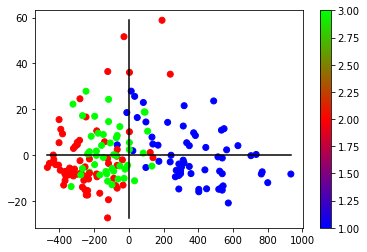

In [ ]:
tx = model.transform(x)
plt.scatter(tx[:,0], tx[:,1], c=y, cmap="brg")
plt.plot([min(tx[:, 0]), max(tx[:, 0])], [0, 0], color="#000000")#x軸
plt.plot([0, 0], [min(tx[:, 1]), max(tx[:, 1])], color="#000000")#y軸
plt.colorbar()
plt.show()

In [ ]:
dffac.to_csv("factor.csv", encoding="shift-jis")

因子負荷量をCSVに変換して内容を確認する。その主成分で因子負荷量が正に大きければプラスに大きな値を取り、負に大きければマイナスに大きな値になる。

実際にデータを確認してみると第一主成分は「Proline」が正に大きく第二主成分では「Mg」が正に大きいことが分かる。

このことから第一象限ではProlineおよびMgが大きい。第二象限ではProlineが小さくMgが大きい。第三象限は第一象限と逆の結果となり第四象限は第二象限と逆の結果になる。

グラフでは「wine」のラベルごとに色を変えており、ここから分かることとして「1」のラベルはProlineが大きい傾向にあり、「2」のラベルはProlineが小さい傾向にあることが分かる。また、「2」のラベルは第二主成分軸で見るとマイナスの値に集中しているためMgの値が小さいことが分かる

In [ ]:
df1 = df.query("Wine==1")
df2 = df.query("Wine==2")

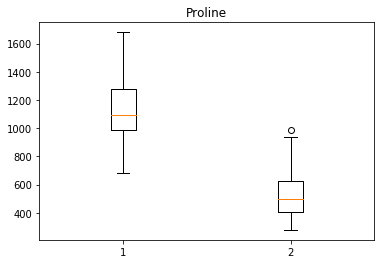

In [ ]:
plt.title("Proline")
plt.boxplot([df1["Proline"].values, df2["Proline"].values])
plt.show()

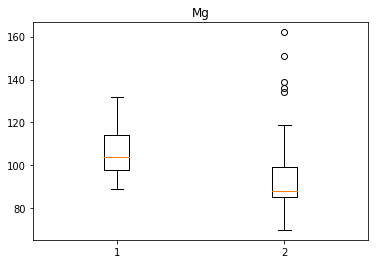

In [ ]:
plt.title("Mg")
plt.boxplot([df1["Mg"].values, df2["Mg"].values])
plt.show()